Epoch 1/10


178/178 [==============================] - 21s 110ms/step - loss: 0.4521 - accuracy: 0.8102 - val_loss: 0.4012 - val_accuracy: 0.8340
Epoch 2/10
178/178 [==============================] - 19s 106ms/step - loss: 0.4175 - accuracy: 0.8261 - val_loss: 0.3728 - val_accuracy: 0.8453
Epoch 3/10
178/178 [==============================] - 19s 107ms/step - loss: 0.3913 - accuracy: 0.8359 - val_loss: 0.4206 - val_accuracy: 0.8481
Epoch 4/10
178/178 [==============================] - 19s 105ms/step - loss: 0.3712 - accuracy: 0.8459 - val_loss: 0.3520 - val_accuracy: 0.8572
Epoch 5/10
178/178 [==============================] - 19s 110ms/step - loss: 0.3378 - accuracy: 0.8619 - val_loss: 0.3320 - val_accuracy: 0.8727
Epoch 6/10
178/178 [==============================] - 18s 99ms/step - loss: 0.3019 - accuracy: 0.8792 - val_loss: 0.3693 - val_accuracy: 0.8565
Epoch 7/10
178/178 [==============================] - 17s 97ms/step - loss: 0.2788 - accuracy: 0.8816 - val_loss: 0.3507 - val_ac

c:\Users\dhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 1s 23ms/step - loss: 0.3687 - accuracy: 0.8601
Test Accuracy: 86.01%
45/45 [==============================] - 1s 23ms/step
Test Precision: 0.91
Test Recall: 0.88
Test F1 Score: 0.89


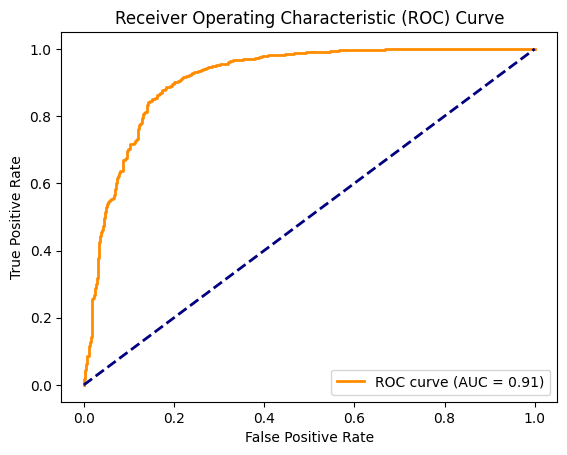

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

all_folder = "C:\\Users\\dhanu\\OneDrive\\Desktop\\clache\\trained_data\\all"
hem_folder = "C:\\Users\\dhanu\\OneDrive\\Desktop\\clache\\trained_data\\hem"


def read_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".bmp"):  
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
            img = cv2.resize(img, (100, 100))  
            images.append(img) 
            labels.append(label)
    return images, labels



all_images, all_labels = read_and_preprocess_images(all_folder, 1)
hem_images, hem_labels = read_and_preprocess_images(hem_folder, 0)

X = np.concatenate([all_images, hem_images], axis=0)
y = np.concatenate([all_labels, hem_labels], axis=0)

X = np.array(X)
y = np.array(y)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((-1, 100, 100, 3))
X_test = X_test.reshape((-1, 100, 100, 3))


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model_filename = "cnn_model.h5"
model.save(model_filename)
print(f"Trained CNN model saved as {model_filename}")

evaluation = model.evaluate(X_test, y_test)
test_accuracy = evaluation[1]
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

precision = precision_score(np.argmax(y_test, axis=1), y_test_pred)
recall = recall_score(np.argmax(y_test, axis=1), y_test_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred)

print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")

fpr, tpr, thresholds = roc_curve(np.argmax(y_test, axis=1), y_test_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
